In [1]:
from multiplexifsimulator.formats.inform import FrameEmitterInForm
from pythologist_image_utilities import read_tiff_stack
from plotnine import *
import matplotlib.pyplot as plt
from pythologist_test_images import TestImages
import pandas as pd

In [2]:
cdf = TestImages().celldataframe('IrisSpatialFeatures')
#cdf = cpi.cdf

In [3]:
size = read_tiff_stack('Example/MEL2/MEL2_2_binary_seg_maps.tif')[0]['raw_image'].shape

In [4]:
fe = FrameEmitterInForm(size)

MEL3_1


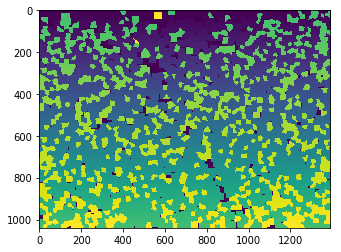

MEL3_2


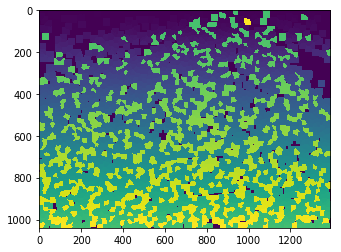

MEL2_2


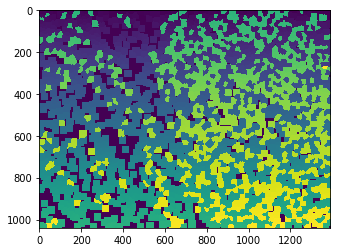

MEL2_7


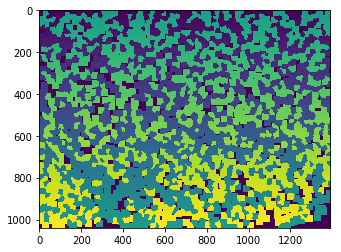

In [5]:
for frame in cdf['frame_name'].unique():
    print(frame)
    sub = cdf.loc[cdf['frame_name']==frame]
    fe.set_cell_coordinates(pd.DataFrame(sub)[['cell_index','x','y']].rename(columns={'cell_index':'id'}))
    cell_image, edge_image, processed_image = fe.make_cell_image()
    plt.imshow(cell_image)
    plt.show()
    fe.save_binary_seg_maps(frame+'_binary_seg_maps.tif')

In [6]:
fe.edge_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])